<a href="https://colab.research.google.com/github/renanfrancosjc/brasileirao/blob/main/brasileirao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas


In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale

from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Tratamento dos dados

In [3]:
data = pd.read_csv('/content/BRA.csv')
display(data.head())

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [4]:
data = data.dropna()

In [5]:
from sklearn.preprocessing import LabelEncoder

res = data['Res']

encoder = LabelEncoder()

data['Res'] = encoder.fit_transform(res)
data['home_id'] = encoder.fit_transform(data['Home'])
data['away_id'] = encoder.fit_transform(data['Away'])

In [6]:
data.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,home_id,away_id
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,1,...,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,27,30
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,1,...,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,34,18
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,2,...,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,17,26
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,2,...,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,7,33
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,0,...,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,12,19


#Analise inical dos dados

In [7]:
matches = data.shape[0]

features = data.shape[1] - 1

home = len(data[data.Res==2])
away = len(data[data.Res==0])
draw = len(data[data.Res==1])
val = [home, away, draw]

win_rate = (float(home/matches)) *100
away_rate = (float(away/matches)) *100
draw_rate = (float(draw/matches)) *100

print('*'*8, 'Tabela de Resultados', '*'*8)
print()
print('total de jogos :', matches)
print('total de colunas : ', features)
print('total de jogos ganhos em casa : ', home)
print('total de jogos ganho fora de casa : ', away)
print('total de empates : ', draw)
print()
print(f'percentual de jogos ganhos em casa : {win_rate:.2f}%')
print(f'percentual de jogos ganhos fora : {away_rate:.2f}%')
print(f'percentual de jogos empatados : {draw_rate:.2f}%')

******** Tabela de Resultados ********

total de jogos : 4559
total de colunas :  20
total de jogos ganhos em casa :  2210
total de jogos ganho fora de casa :  1121
total de empates :  1228

percentual de jogos ganhos em casa : 48.48%
percentual de jogos ganhos fora : 24.59%
percentual de jogos empatados : 26.94%


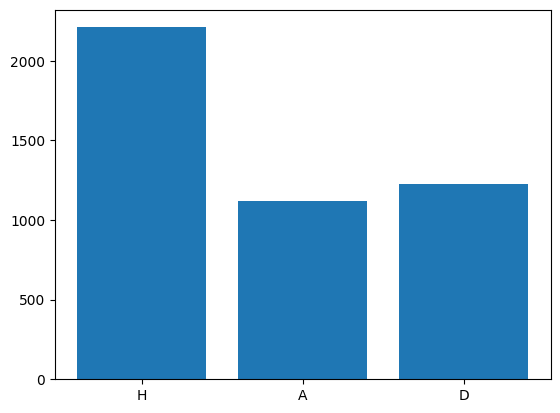

In [8]:
x = np.arange(3)
plt.bar(x,val)
plt.xticks(x, ('H', 'A', 'D'))
plt.show()

#Preparando o Dataset para o teste de modelo

In [9]:
ex = data.select_dtypes(exclude=['number']).columns

num_data = data.drop(columns=ex)
data_num = pd.DataFrame(num_data)
data_num.head()

,Season,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,home_id,away_id
0,2012,1.0,1.0,1,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,27,30
1,2012,1.0,1.0,1,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,34,18
2,2012,2.0,1.0,2,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,17,26
3,2012,4.0,2.0,2,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,7,33
4,2012,0.0,1.0,0,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,12,19


In [10]:
features = data_num.drop(['Res'], axis=1)
label = data_num['Res']

print('features : ', features)
print()
print('label : ', label)

features :        Season   HG   AG    PH    PD    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA  \
0       2012  1.0  1.0  1.75  3.86  5.25  1.76  3.87  5.31  1.69  3.50  4.90   
1       2012  1.0  1.0  2.83  3.39  2.68  2.83  3.42  2.70  2.59  3.23  2.58   
2       2012  2.0  1.0  1.60  4.04  6.72  1.67  4.05  7.22  1.59  3.67  5.64   
3       2012  4.0  2.0  2.49  3.35  3.15  2.49  3.39  3.15  2.35  3.26  2.84   
4       2012  0.0  1.0  1.96  3.53  4.41  1.96  3.53  4.41  1.89  3.33  3.89   
...      ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
4555    2023  2.0  3.0  2.08  3.92  3.35  2.16  3.96  3.45  2.08  3.75  3.23   
4556    2023  3.0  1.0  2.10  3.38  3.71  2.18  3.51  3.86  2.09  3.36  3.56   
4557    2023  1.0  2.0  1.95  3.33  4.50  1.98  3.47  4.60  1.94  3.28  4.23   
4558    2023  1.0  0.0  3.41  3.36  2.26  3.56  3.46  2.34  3.35  3.28  2.21   
4559    2023  2.0  1.0  2.21  3.35  3.54  2.28  3.49  3.75  2.18  3.31  3.38   

      home_id  away_id  
0 

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
features =imputer.fit_transform(features)

In [12]:
label = label.values.reshape(-1, 1)

In [13]:
lista = ('HG', 'AG', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, label)

k_best_features_score = k_best_features.scores_
raw_pairs = zip(lista[1:], k_best_features_score)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()

print('melhores features')
print(k_best_features_final)

melhores features
{'PH': 1503.0869703325689, 'PD': 1468.1276324307619, 'PA': 191.59750834648688, 'AvgA': 187.10743515421757, 'MaxD': 171.31934922348148, 'MaxA': 170.05710964526568, 'AvgD': 168.94525132098426, 'AvgH': 89.48790024795996, 'MaxH': 86.63867653529435, 'AG': 2.7288248056410405}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
features = num_data.drop(['Res', 'Season', 'home_id', 'away_id', 'AG', 'MaxH', 'AvgH'], 1)

labels = num_data['Res']

print(features)
print(labels)

       HG    PH    PD    PA  MaxD  MaxA  AvgD  AvgA
0     1.0  1.75  3.86  5.25  3.87  5.31  3.50  4.90
1     1.0  2.83  3.39  2.68  3.42  2.70  3.23  2.58
2     2.0  1.60  4.04  6.72  4.05  7.22  3.67  5.64
3     4.0  2.49  3.35  3.15  3.39  3.15  3.26  2.84
4     0.0  1.96  3.53  4.41  3.53  4.41  3.33  3.89
...   ...   ...   ...   ...   ...   ...   ...   ...
4555  2.0  2.08  3.92  3.35  3.96  3.45  3.75  3.23
4556  3.0  2.10  3.38  3.71  3.51  3.86  3.36  3.56
4557  1.0  1.95  3.33  4.50  3.47  4.60  3.28  4.23
4558  1.0  3.41  3.36  2.26  3.46  2.34  3.28  2.21
4559  2.0  2.21  3.35  3.54  3.49  3.75  3.31  3.38

[4559 rows x 8 columns]
0       1
1       1
2       2
3       2
4       0
       ..
4555    0
4556    2
4557    0
4558    2
4559    2
Name: Res, Length: 4559, dtype: int64


<ipython-input-14-ae6bb7eccf49>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = num_data.drop(['Res', 'Season', 'home_id', 'away_id', 'AG', 'MaxH', 'AvgH'], 1)


#Teste de modelos

In [15]:
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print(features_scale.shape)
print(features_scale)

(4559, 8)
[[0.14285714 0.04036145 0.13594233 ... 0.1475     0.11913357 0.14746363]
 [0.14285714 0.10542169 0.08753862 ... 0.075      0.0866426  0.0562328 ]
 [0.28571429 0.0313253  0.15447992 ... 0.20055556 0.13959085 0.17656311]
 ...
 [0.14285714 0.05240964 0.08135942 ... 0.12777778 0.09265945 0.12111679]
 [0.14285714 0.14036145 0.08444902 ... 0.065      0.09265945 0.04168305]
 [0.28571429 0.06807229 0.08341916 ... 0.10416667 0.09626955 0.0876917 ]]


In [16]:
X_train = features_scale[:1932]
X_test =  features_scale[1932:2155]
y_train = labels[:1932]
y_test =  labels[1932:2155]

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

1932 223
1932 223


In [17]:
lr = LogisticRegression(multi_class='multinomial', max_iter=200)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

acura = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='micro')
print(f'Acuracia Logistic Regression : {acura:.2f}')
print(f'F1 Score : {f1:.2f}')

Acuracia Logistic Regression : 0.57
F1 Score : 0.57


In [19]:
param_grid = {'C': [0.001, 0.01, 1, 10, 100, 1000]}

search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

search.fit(X_train, y_train)
clf_grid = search.best_estimator_
pred = clf_grid.predict(X_test)
lg_acc = accuracy_score(y_test, pred)

f1 = f1_score(y_test, pred, average='macro')

print(f'Acuracia LR: {lg_acc:.2f}')
print(f'F1 Score: {f1:.2f}')

Acuracia LR: 0.57
F1 Score: 0.50


In [20]:
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
pred = clf_svc.predict(X_test)

svc_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='micro')

print(svc_acc)
print(f1)

0.5829596412556054
0.5829596412556054


In [21]:
param_grid = {'C': [0.001, 0.01, 1, 10, 100, 1000]}

search = GridSearchCV(SVC(max_iter=1000), param_grid)

search.fit(X_train, y_train)
clf = search.best_estimator_
pred = clf.predict(X_test)
lg_acc = accuracy_score(y_test, pred)

f1 = f1_score(y_test, pred, average='macro')

print(f'Acuracia LR: {lg_acc:.2f}')
print(f'F1 Score: {f1:.2f}')



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

Acuracia LR: 0.61
F1 Score: 0.51


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [22]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

dt_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'macro')

print(dt_acc)
print(f1)

0.5067264573991032
0.48218872373573624


In [23]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

nb_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'micro')

print(nb_acc)
print(f1)

0.5201793721973094
0.5201793721973094


#SVC

In [24]:
prev = features_scale[:2155]

home_id = data['home_id']
home_id_test = home_id[:2155]

away_id = data['away_id']
away_id_test = away_id[:2155]

res = data['Res']
res_teste = res[:2155]

pred=clf_svc.predict(prev)

df=pd.DataFrame({'Real': res_teste, 'Previsao': pred, 'Home_id':home_id_test , 'Away_id': away_id_test})

df

,Real,Previsao,Home_id,Away_id
0,1,2,27,30
1,1,2,34,18
2,2,2,17,26
3,2,2,7,33
4,0,0,12,19
...,...,...,...,...
2151,1,2,35,11
2152,0,0,27,32
2153,0,0,5,2
2154,0,2,7,36
